## Import Plugin

In [165]:
# import tensorflow
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.preprocessing.image import ImageDataGenerator

## Tensorflow Version

In [166]:
# version of tensorflow
print(tf.__version__)

2.3.0


## Input data

In [167]:
# input data
!wget --no-check-certificate \
  https://dicodingacademy.blob.core.windows.net/picodiploma/ml_pemula_academy/rockpaperscissors.zip \
  -O /tmp/rockpaperscissors.zip

--2020-10-28 02:52:44--  https://dicodingacademy.blob.core.windows.net/picodiploma/ml_pemula_academy/rockpaperscissors.zip
Resolving dicodingacademy.blob.core.windows.net (dicodingacademy.blob.core.windows.net)... 52.239.197.36
Connecting to dicodingacademy.blob.core.windows.net (dicodingacademy.blob.core.windows.net)|52.239.197.36|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 322873683 (308M) [application/zip]
Saving to: ‘/tmp/rockpaperscissors.zip’

/tmp/rockpapersciss 100%[===================>] 307.92M  8.35MB/s    in 43s     

2020-10-28 02:53:28 (7.24 MB/s) - ‘/tmp/rockpaperscissors.zip’ saved [322873683/322873683]



## Ekstrak Data

In [168]:
# melakukan ekstraksi pada file zip
import zipfile,os, shutil
path = '/tmp/rockpaperscissors'
if os.path.exists(path):
  shutil.rmtree(path)
local_zip = '/tmp/rockpaperscissors.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('/tmp')
zip_ref.close()

base_dir = '/tmp/rockpaperscissors/rps-cv-images'
# remove readme
os.remove(os.path.join(base_dir, 'README_rpc-cv-images.txt'))
os.listdir(base_dir)

['scissors', 'rock', 'paper']

## Train Data And Validation Data

In [169]:
from sklearn.model_selection import train_test_split
CLASSIFICATION = ["paper", "rock", "scissors"]


In [170]:
train_dir = os.path.join(base_dir, "train")
os.mkdir(train_dir)

for cs in CLASSIFICATION:
  # make directory
  os.mkdir(os.path.join(train_dir, cs))

validation_dir = os.path.join(base_dir, "val")
os.mkdir(validation_dir)
for cs in CLASSIFICATION:
  #make directory
  os.mkdir(os.path.join(validation_dir, cs))

In [171]:
for cs in CLASSIFICATION:
  train_path = os.path.join(train_dir, cs)
  val_path = os.path.join(validation_dir, cs)
  # membagi dataset menjadi training dan testing 
  train_path, val_path = train_test_split(os.listdir(os.path.join(base_dir, cs)), test_size=0.40) #40% dari data set
  #copy data
  for file in train_path:
    shutil.copy(os.path.join(os.path.join(base_dir, cs), file), os.path.join(os.path.join(train_dir, cs), file))
  for file in val_path:
    shutil.copy(os.path.join(os.path.join(base_dir, cs), file), os.path.join(os.path.join(validation_dir, cs), file))

In [172]:
# image generator
train_datagen = ImageDataGenerator(
                    rescale=1./255,
                    rotation_range=20,
                    horizontal_flip=True,
                    shear_range = 0.2,
                    fill_mode = 'nearest')

test_datagen = ImageDataGenerator(
                    rescale=1./255,
                    rotation_range=20,
                    horizontal_flip=True,
                    shear_range = 0.2,
                    fill_mode = 'nearest')

val_datagen = ImageDataGenerator(
                    rescale=1./255,
                    rotation_range=20,
                    horizontal_flip=True,
                    shear_range = 0.2,
                    fill_mode = 'nearest')

In [185]:
train_generator = train_datagen.flow_from_directory(
        train_dir,  # direktori data latih
        target_size=(150, 150),  # mengubah resolusi seluruh gambar menjadi 150x150 piksel
        batch_size=4,
        class_mode='categorical')

validation_generator = val_datagen.flow_from_directory(
        validation_dir, # direktori data validasi
        target_size=(150, 150), # mengubah resolusi seluruh gambar menjadi 150x150 piksel
        batch_size=4, 
        class_mode='categorical')

Found 1312 images belonging to 3 classes.
Found 876 images belonging to 3 classes.


## Sequential Model

In [186]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(150, 150, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dropout(0.5), #dropout
    tf.keras.layers.Dense(512, activation='relu'),
    # tf.keras.layers.Dense(128, activation='relu'),
    # tf.keras.layers.Dense(3, activation='relu')
    tf.keras.layers.Dense(3, activation='softmax')
])

In [187]:
# compile model dengan 'adam' optimizer loss function 'binary_crossentropy'
model.compile(loss='categorical_crossentropy',      #categorical_crossentropy
              optimizer='Adam',
              metrics=['accuracy'])

In [189]:
# latih model dengan model.fit 
history = model.fit(
      train_generator,
      steps_per_epoch=25,  # berapa batch yang akan dieksekusi pada setiap epoch
      epochs=10,
      validation_data=validation_generator, # menampilkan akurasi pengujian data validasi
      validation_steps=5,  # erapa batch yang akan dieksekusi pada setiap epoch
      verbose=1)
      

Epoch 1/10
25/25 [==============================] - 6s 251ms/step - loss: 0.7911 - accuracy: 0.6800 - val_loss: 0.3762 - val_accuracy: 0.9167
Epoch 2/10
25/25 [==============================] - 6s 248ms/step - loss: 0.8084 - accuracy: 0.6600 - val_loss: 0.8716 - val_accuracy: 0.6667
Epoch 3/10
25/25 [==============================] - 6s 253ms/step - loss: 0.5857 - accuracy: 0.7600 - val_loss: 0.6006 - val_accuracy: 0.5833
Epoch 4/10
25/25 [==============================] - 6s 252ms/step - loss: 0.5241 - accuracy: 0.7900 - val_loss: 0.3408 - val_accuracy: 0.9167
Epoch 5/10
25/25 [==============================] - 6s 249ms/step - loss: 0.6119 - accuracy: 0.7600 - val_loss: 0.3952 - val_accuracy: 0.9167
Epoch 6/10
25/25 [==============================] - 6s 249ms/step - loss: 0.5004 - accuracy: 0.8200 - val_loss: 0.2395 - val_accuracy: 0.8333
Epoch 7/10
25/25 [==============================] - 6s 252ms/step - loss: 0.3844 - accuracy: 0.8500 - val_loss: 0.0560 - val_accuracy: 1.0000
Epoch 

## Grafik

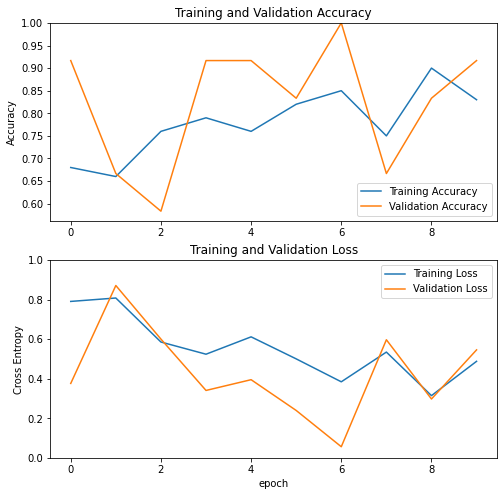

In [190]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

plt.figure(figsize=(8, 8))
plt.subplot(2, 1, 1)
plt.plot(acc, label='Training Accuracy')
plt.plot(val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.ylabel('Accuracy')
plt.ylim([min(plt.ylim()),1])
plt.title('Training and Validation Accuracy')

plt.subplot(2, 1, 2)
plt.plot(loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.ylabel('Cross Entropy')
plt.ylim([0,1.0])
plt.title('Training and Validation Loss')
plt.xlabel('epoch')
plt.show()


In [191]:
loss, accuracy = model.evaluate(train_generator)
print('Test accuracy :', accuracy)


328/328 [==============================] - 27s 81ms/step - loss: 0.3754 - accuracy: 0.8857
Test accuracy : 0.8856707215309143


## Test Model

Saving 4iN0sQcmcukBN652.png to 4iN0sQcmcukBN652.png
4iN0sQcmcukBN652.png
1
rock


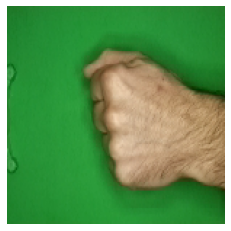

In [193]:
import numpy as np
from google.colab import files
from keras.preprocessing import image
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline

uploaded = files.upload()

for fn in uploaded.keys():
 
  # predicting images
  path = fn
  img = image.load_img(path, target_size=(150,150))
  imgplot = plt.imshow(img)
  x = image.img_to_array(img)
  x = np.expand_dims(x, axis=0)

  images = np.vstack([x])
  hasil = model.predict(images, batch_size=10)
  
  plt.axis("off")
  print(fn)
  kriteria = {
      0: "paper", 
      1: "rock", 
      2: "scissors"
      }
  print(hasil.argmax())
  print(kriteria[hasil.argmax()])

## Data Diri


*  nama = Ahmad Ropai
*  email = akhmadrofai@gmail.com